In [56]:
import sys
import math
import sklearn
import statistics
import numpy as np
import pandas as pd
import seaborn as sns
from time import time
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
%config IPcompletor.greedy = True
print("Python: {}".format(sys.version))

Python: 3.7.3 (default, Apr 24 2019, 15:29:51) [MSC v.1915 64 bit (AMD64)]


In [57]:
train_set = pd.read_csv("tcd ml 2019-20 income prediction training (with labels).csv", index_col = 0)
test_set = pd.read_csv("tcd ml 2019-20 income prediction test (without labels).csv", index_col = 0)

In [58]:
train_set[train_set.columns]=train_set[train_set.columns].fillna(train_set.mode().iloc[0])
test_set[test_set.columns]=test_set[test_set.columns].fillna(train_set.mode().iloc[0])

### Encoding
 --for categorical data

In [59]:
t = train_set.Profession.value_counts()
p = t[t <10].index.tolist()
p.extend(set(test_set["Profession"].values) - set(t.index.tolist()))
t = train_set.Country.value_counts()
c = t[t <10].index.tolist()
c.extend(set(test_set["Country"].values) - set(t.index.tolist()))

In [60]:
t = dict((k,"Rare") for k in p)
train_set["Profession"] = train_set["Profession"].replace(t)
test_set["Profession"] = test_set["Profession"].replace(t)
c = dict((k,"Rare") for k in c)
train_set["Country"] = train_set["Country"].replace(c)
test_set["Country"] = test_set["Country"].replace(c)

### Outlier Detection

In [62]:
# res = train_set.groupby("Profession")["Income in EUR"].quantile([0.01, 0.99]).unstack(level=1)
# train_set = train_set.loc[((res.loc[train_set.Profession, 0.01] < train_set["Income in EUR"].values) & (train_set["Income in EUR"].values < res.loc[train_set.Profession, 0.99])).values]
# temp.shape
# res = train_set.groupby("Country")["Income in EUR"].quantile([0.001, 0.999]).unstack(level=1)
# train_set = train_set.loc[((res.loc[train_set.Country, 0.001] < train_set["Income in EUR"].values) & (train_set["Income in EUR"].values < res.loc[train_set.Country, 0.999])).values]


In [63]:
prof = train_set.groupby('Profession').agg({"Income in EUR": 'mean'})
prof = dict(zip(prof.index, prof["Income in EUR"]))
country = train_set.groupby('Country').agg({"Income in EUR": 'mean'})
country = dict(zip(country.index, country["Income in EUR"]))
degree = train_set.groupby('University Degree').agg({"Income in EUR": 'mean'})
degree = dict(zip(degree.index, degree["Income in EUR"]))
gender = train_set.groupby('Gender').agg({"Income in EUR": 'mean'})
gender = dict(zip(gender.index, gender["Income in EUR"]))
color = train_set.groupby('Hair Color').agg({"Income in EUR": 'mean'})
color = dict(zip(color.index, color["Income in EUR"]))

In [66]:
train_set["train"] = 1
test_set["train"] = 0
train_db = pd.concat([train_set,test_set])

C:\Users\vansh\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


In [68]:
train_db["Profession"] = train_db["Profession"].replace(prof)
train_db["Country"] = train_db["Country"].replace(country)
train_db["University Degree"] = train_db["University Degree"].replace(degree)
train_db["Gender"] = train_db["Gender"].replace(gender)
train_db["Hair Color"] = train_db["Hair Color"].replace(color)

### Data Cleaning
1. Removing NULL values
2. Noise
3. Inconsistent Data

In [70]:
train_db = train_db.rename(columns= {"Body Height [cm]":  "Body Height"})

In [71]:
train_db["Year of Record"] = train_db["Year of Record"].fillna(statistics.median(train_db['Year of Record'])).astype('int')
train_db["Age"] = train_db["Age"].fillna(statistics.median(train_db['Age'])).astype('int')

## Split

In [82]:
# train_db = train_db.drop(columns=["Gender", "Hair Color"])

In [83]:
train = train_db[train_db["train"] ==1].drop(columns=["Income in EUR","Income", "train"], axis =1)
test = train_db[train_db["train"] ==0].drop(columns=["Income in EUR","Income", "train"], axis =1)
train_income = train_db[train_db["train"] ==1]["Income in EUR"]

In [84]:
test.isnull().sum()

Age                  0
Body Height          0
Country              0
Gender               0
Hair Color           0
Profession           0
Size of City         0
University Degree    0
Wears Glasses        0
Year of Record       0
dtype: int64

## MODEL CREATION

In [85]:
submit = pd.read_csv("tcd ml 2019-20 income prediction submission file.csv", index_col= 0)

In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train, train_income, test_size=0.2, random_state=122)

### Polynomial Regression

In [87]:
from sklearn.preprocessing import PolynomialFeatures

In [88]:
poly = PolynomialFeatures(degree=3, interaction_only = True)
X_ = poly.fit_transform(X_train)
test_ = poly.fit_transform(X_test)
new_train = poly.fit_transform(train)
new_test = poly.fit_transform(test)

### Linear Regression

In [ ]:
import math
from sklearn.metrics import mean_squared_error

In [ ]:
model = linear_model.LinearRegression()
lmodel = model.fit(X_, y_train)

y_pred = lmodel.predict(test_)
math.sqrt(mean_squared_error(y_test, y_pred))

In [ ]:
model = linear_model.LinearRegression()
lmodel = model.fit(train, train_income)

y_pred = lmodel.predict(test)

In [ ]:
from sklearn.svm import SVR
from time import time

### Support Vector Machine

In [ ]:
begin = time()
model = SVR(kernel = 'linear', gamma='scale',epsilon=0.1)
lmodel = model.fit(X_train, y_train)
end = time()
print("Time elapsed: {}".format(end-begin))

In [ ]:
y_pred = lmodel.predict(X_test)
math.sqrt(mean_squared_error(y_test, y_pred))

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
begin = time()
model = RandomForestRegressor(random_state=42, n_estimators=400, warm_start = True)
lmodel = model.fit(X_train, y_train)
end = time()
print("Time elapsed: {}".format(end-begin))

In [102]:
y_pred = lmodel.predict(X_test)
math.sqrt(mean_squared_error(y_test, y_pred))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    4.5s finished


36024.65920344338

In [38]:
begin = time()
model = RandomForestRegressor(random_state=42, n_estimators=400, warm_start = True)
lmodel = model.fit(train, train_income)
end = time()
print("Time elapsed: {}".format(end-begin))
y_pred = lmodel.predict(test)

Time elapsed: 494.89382147789


### XGBoost
--with cross validation

In [ ]:
data_dmatrix = xgb.DMatrix(data=train,label=train_income)
params = {"objective": "reg:linear", "random_state": 123, "learning_rate": 0.15, "max_depth" : 7, "subsample": 0.75, 
                         "colsample_bytree" : 0.7, "booster" : 'gbtree'}
cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=4,
                    num_boost_round=100,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=223)
cv_results.tail()

[13:34:40] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


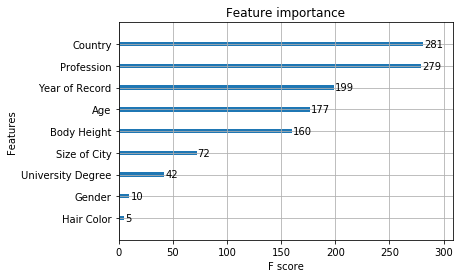

In [21]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

In [41]:
from sklearn.model_selection import KFold, RandomizedSearchCV, GridSearchCV
kfold = KFold(n_splits =5, shuffle=False)
rmse_scores = []
folds = 3
param_comb = 5
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0, 0.75],
        'colsample_bytree': [0.6, 0.8, 1.0, 0.85],
        'max_depth': [3, 4, 5, 6, 7, 8],
        'learning_rate': [0.1, 0.2, 0.5, 0.05],
        'n_estimator': [80, 100, 70, 60, 200]
        }

In [89]:
import xgboost as xgb
import statistics
begin = time()

model = xgb.XGBRegressor(objective="reg:linear", random_state=145, learning_rate = 0.1, max_depth = 7, subsample= 0.75, 
                         colsample_bytree = 0.9, n_estimators=80)
# random_search = GridSearchCV(model, param_grid=params, n_jobs=-1)
# for train_idx, test_idx in kfold.split(train):
#     X_train, y_train, X_valid, y_valid = train[train_idx], train_income[train_idx], train[test_idx], train_income[test_idx]
lmodel = model.fit(X_, y_train)
y_pred = lmodel.predict(test_)
# rmse_scores.append(math.sqrt(mean_squared_error(y_test, y_pred)))
end = time()
print("Time elapsed: {}".format(end-begin))
# y_pred = cross_val_predict(lmodel, X_test, cv=10)
# y_pred = lmodel.predict(X_test)
math.sqrt(mean_squared_error(y_test, y_pred))

C:\Users\vansh\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[23:52:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Time elapsed: 138.99601340293884


53962.645469043535

In [96]:
begin = time()
model = xgb.XGBRegressor(objective="reg:linear", random_state=140, learning_rate = 0.1, max_depth = 7, subsample= 0.75, 
                         colsample_bytree = 0.9, n_estimators=80)
lmodel = model.fit(new_train, train_income)
end = time()
print("Time elapsed: {}".format(end-begin))
y_pred = lmodel.predict(new_test)

[23:59:29] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Time elapsed: 186.737957239151


## KNN

In [ ]:
from sklearn import neighbors
begin = time()
model = neighbors.KNeighborsRegressor(n_neighbors = 107)
lmodel = model.fit(X_train, y_train)
end = time()
print("Time elapsed: {}".format(end-begin))
y_pred = lmodel.predict(X_test)
math.sqrt(mean_squared_error(y_test, y_pred))

In [ ]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[21, 22,23,24, 25,26,27,28,29,30 ]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train,y_train)
model.best_params_

## Decision Tree

In [19]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
regressor = DecisionTreeRegressor(random_state=0)
cross_val_score(regressor, train, train_income, cv=49)

array([0.6920059 , 0.68275332, 0.62374457, 0.66352634, 0.55277182,
       0.70031145, 0.64329849, 0.69199835, 0.65355293, 0.68163334,
       0.68652761, 0.63072705, 0.56980449, 0.67705928, 0.68301221,
       0.75316579, 0.7055189 , 0.61963735, 0.73879632, 0.64324346,
       0.66227077, 0.71761778, 0.6273328 , 0.75427479, 0.6517717 ,
       0.63206473, 0.60323423, 0.71242704, 0.64507502, 0.65246756,
       0.72151913, 0.64174699, 0.61614238, 0.68347153, 0.67370904,
       0.59182153, 0.66024207, 0.71152851, 0.76493018, 0.69579225,
       0.74576291, 0.73522636, 0.70760334, 0.64216747, 0.72974338,
       0.7285919 , 0.62451864, 0.51862191, 0.6363468 ])

### Submission

In [97]:
submit["Income"] = y_pred
submit.head()

,Income
Instance,
111994,35552.507812
111995,11573.395508
111996,28929.787109
111997,114239.734375
111998,29116.521484


In [98]:
submit.to_csv(r"C:\Users\vansh\TCD MAI\Machine Learning\IndividualAssignment\MLbasic\prediction.csv", index = True)